# Understanding Recurrent Neural Network Through Sine Waves

In [33]:
# 0. Import all the libararies and packages we will need
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.contrib import rnn

% matplotlib inline

## 1. Let's define a function to generate sine waves in the format we want

- Past data: [batch_size x past_range x 1]
- Future data: [batch_size x future_range]

In [64]:
def generate_sin(batch_size=1000, T=50, t_offset = 0, y_offset=0, past_range=10, future_range=10):
    '''
    For now: assume amplitude = 1
    y = sin(wt+ t_offset) +  y_offset

    '''
    f = (2 * np.pi) / T
    
    past = np.empty((batch_size, past_range))
    future = np.empty((batch_size, future_range))
    
    for t in range(batch_size):
        past[t,:] = np.sin(t_offset + f*np.array(range(t-past_range, t))) + y_offset
        future[t,:] = np.sin(t_offset + f*np.array(range(t,t+future_range))) + y_offset
        
    return np.array(range(batch_size)), past.reshape((batch_size, past_range,1)), future

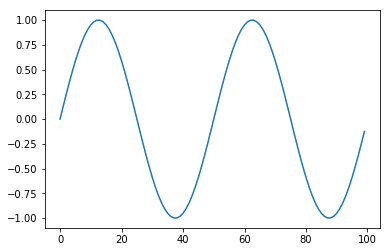

In [65]:
t, p, f = generate_sin(100)
plt.plot(t, f[:,0])

# 2. Let's define a our models

In [34]:
def my_rnn(x, W, b):
    x = tf.transpose(x, [1, 0, 2])
    x = tf.reshape(x, [-1, n_input])
    x = tf.split(x, n_step, axis=0)
    
    lstm_cell = rnn.BasicLSTMCell(n_hidden, forget_bias=1.0)
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
    return tf.nn.bias_add(tf.matmul(outputs[-1], W), b)

In [51]:
learning_rate = 1e-3

n_hidden = 10
n_step = 10
n_input = 1
n_output = 10

n_epoch = 10
epoch_size = 100
n_iter = n_epoch * epoch_size

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, n_step, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

W = tf.Variable(tf.truncated_normal([n_hidden, n_output]))
b = tf.Variable(tf.truncated_normal([n_output]))

h = my_rnn(x, W, b)

individual_losses = tf.reduce_sum(tf.squared_difference(h,y), 1)
loss = tf.reduce_mean(individual_losses)
optimiser = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [69]:
%%time 
batch_size = 50
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for iter in range(n_iter+1):
    # No mini Batch yet
    _, p, f = generate_sin(batch_size)
    optimiser.run(feed_dict={x:p, y:f})
    
    if iter% epoch_size ==0:
        print('Epoch: {} Loss: {}' .format(int(iter/epoch_size), loss.eval(feed_dict={x:p, y:f})))

Epoch: 0 Loss: 16.84148406982422
Epoch: 1 Loss: 7.785309314727783
Epoch: 2 Loss: 3.1766977310180664
Epoch: 3 Loss: 1.3594862222671509
Epoch: 4 Loss: 0.4609212279319763
Epoch: 5 Loss: 0.13718247413635254
Epoch: 6 Loss: 0.051161665469408035
Epoch: 7 Loss: 0.025167305022478104
Epoch: 8 Loss: 0.015521679073572159
Epoch: 9 Loss: 0.011056730523705482
Epoch: 10 Loss: 0.008559575304389
CPU times: user 10.8 s, sys: 248 ms, total: 11.1 s
Wall time: 9.11 s


0.00855957


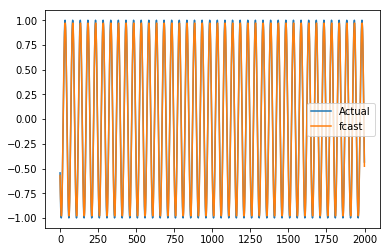

In [70]:
t, p, f = generate_sin(2000, T = 50, t_offset=10)

l = loss.eval(feed_dict={x:p, y:f})
print(l)
fcast = h.eval(feed_dict={x:p})

plt.plot(t, f[:,0], label='Actual')
plt.plot(t, fcast[:,0], label='fcast')
plt.legend()